In [116]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
xvals = linspace(-5, 5, 100)

In [119]:
coins = np.random.binomial(1, 0.8, size=100)

In [120]:
def linear_function(x, a, b):
    return a * x + b

In [121]:
y_noised = linear_function(xvals, 1, 1) + np.random.normal(scale=0.5, size=100)

In [122]:
y_outliers = coins * y_noised + (1-coins) * 15

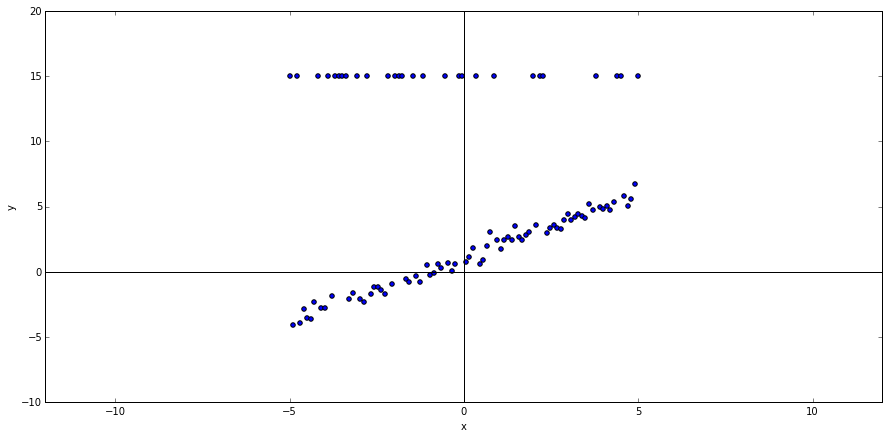

In [124]:
fig = plt.figure(figsize=(15,7), dpi=1000) 
plt.xlim((-12, 12))
plt.scatter(xvals, y_outliers)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('x')
plt.ylabel('y')

In [125]:
def ols(w, x, y):
    return np.sum(np.power(w[0] * x + w[1] - y, 2))

In [126]:
from scipy.optimize import minimize

In [127]:
res = minimize(ols, [0, 0], args=(xvals, y_outliers))

In [128]:
res.x

array([ 0.29096542,  5.18971423])

In [129]:
def draw_fitted(w, title):
    y_fitted = linear_function(xvals, *w)
    fig = plt.figure(figsize=(15,7), dpi=1000) 
    plt.xlim((-12, 12))
    plt.scatter(xvals, y_outliers)
    plt.scatter(xvals, y_fitted, color = 'red')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

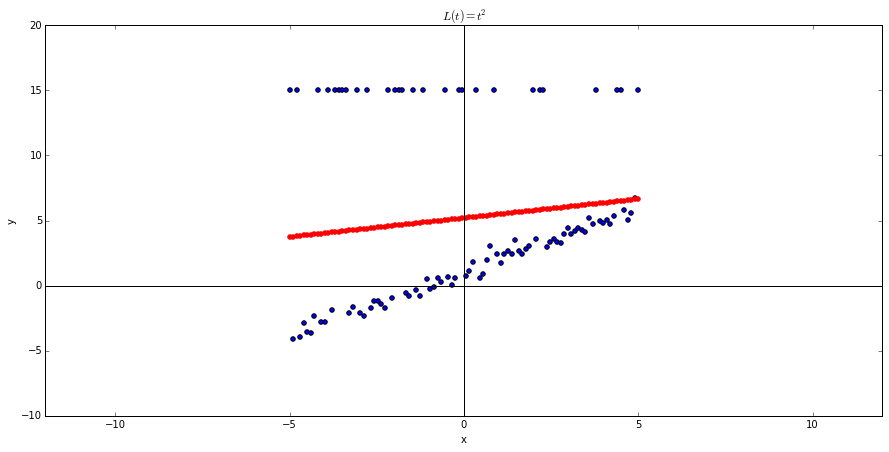

In [130]:
draw_fitted(res.x, "$L(t)=t^2$")

In [131]:
def abs_min(w, x, y):
    return np.sum(np.abs(w[0] * x + w[1] - y))

In [101]:
res_abs = minimize(abs_min, [0,0], args=(xvals, y_outliers))

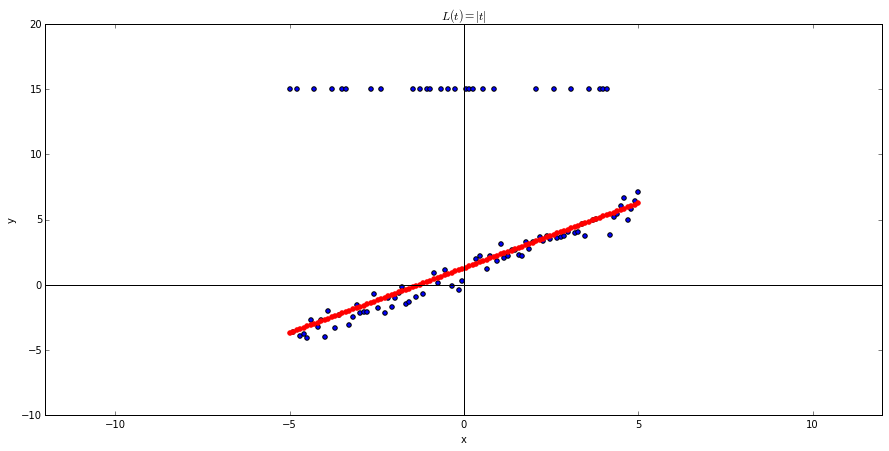

In [113]:
draw_fitted(res_abs.x, "$L(t)=|t|$")

In [104]:
def complex_abs(w, x, y):
    t = w[0] * x + w[1] - y
    return np.sum(0.2 * np.abs(t) * np.array([t < 0]).astype(int) + 0.8 * np.abs(t) * np.array([t >= 0]).astype(int))

In [108]:
res_complex_abs = minimize(complex_abs, [0,0], args=(xvals, y_outliers))

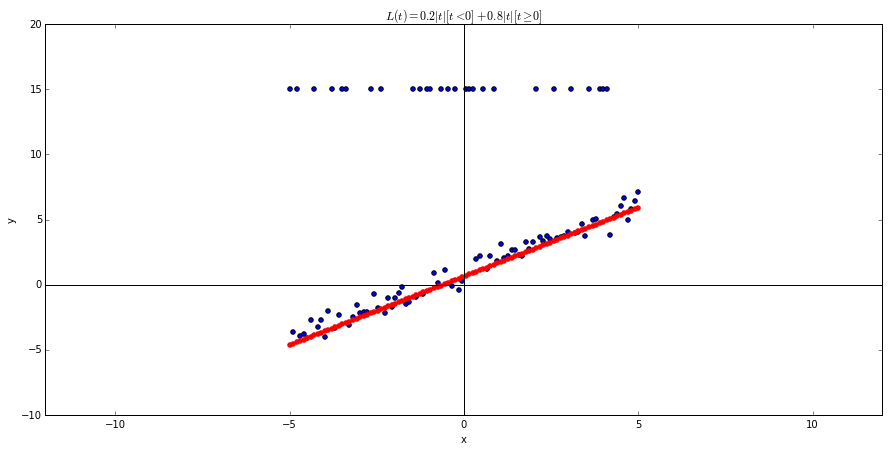

In [115]:
draw_fitted(res_complex_abs.x, "$L(t)=0.2|t|[t<0]+0.8|t|[t \geq 0]$")